In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt # импорт библиотеки визуализации
import warnings
import numpy as np # библиотека для работы с матрицами
warnings.filterwarnings('ignore') # фильтр красных предупреждений

## Зачем линейные модели, когда есть KNN ?
Для ответа на этот вопрос, давайте построим границу классов

In [ ]:
import seaborn as sns
# import seaborn # Можно импортировать так, но тогда вместо вызова методов sns.*, например, sns.load_dataset('iris') придётся использовать длинное название seaborn.load_dataset('iris')
df = sns.load_dataset('iris')
X, y = df.iloc[:, :2], df['species'] # в качестве объектов-признаков берём первые две колонки, которую берём за целевую переменную
values = {specy_name: specy_code for specy_code, specy_name in enumerate(y.unique())} # словарь для кодирования видов цветка в число
# values = {'setosa': 0, 'versicolor': 1, 'virginica': 2} 
y = y.apply(lambda x: values[x])

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X, y)
# создаём сетку для построения графика
h = 0.1 # размер ячейки
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1 # задаём интервалы значений для сетки
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), # делаем сетку значений
 np.arange(y_min, y_max, h))
 
plt.subplot(1, 1, 1)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # получаем предсказания для этой сетки
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
 
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length') # оси и название укажем на английском
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('KNN')
plt.show()

Слишком сложная граница для такой задачи, не правда ли? Наверняка есть варианты решения попроще 

## Одномерная регрессия
Давайте сгенерируем одномерную регрессию (регрессию для объектов с одним признаком)

**Вопрос!** Сколько у такой модели параметров?

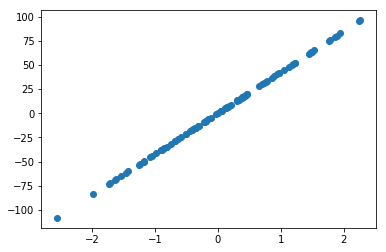

In [3]:
from sklearn.datasets.samples_generator import make_regression # метод для генерации 
X, y = make_regression(n_samples=100, n_features=1, random_state=0) # генерируем 100 объектов с 1 признаком
plt.scatter(X, y)

Обучим простую регрессию

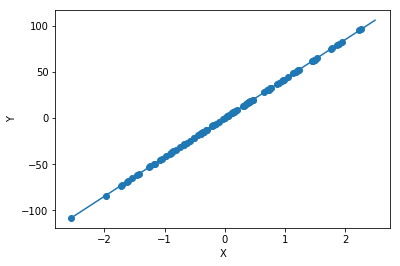

In [4]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression() # инициализация регрессора (пока модель глупая и необученная)
clf.fit(X, y) # говорим модели, какие объекты какой ответ имеют. Модель на них обучается. В итоге модель выучит параметры a и b уравнения y = aX + b
a = clf.coef_[0] # коэффициент при первом (а он у нас 1) признаке
b = clf.intercept_
x_line = np.linspace(-2.5, 2.5) # зададим интервал значений для линии по оси X
y_line = a * x_line + b # подставим найденные коэффициенты a и b в уравнение прямой
plt.scatter(X, y) # нарисуем точки из обучающей выборки
plt.ylabel('Y') # подпишем ось Y
plt.xlabel('X') # подпишем ось X
plt.plot(x_line, y_line) # нарисуем прямую

In [5]:
a, b

(42.38550485581796, 1.7763568394002505e-15)

Давайте теперь посмотрим, как может испортить картину всего 1 аномалия!

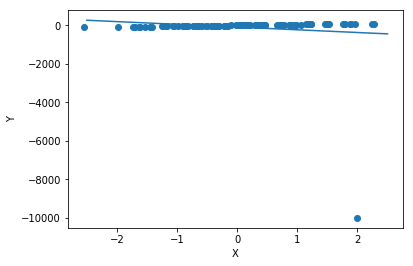

In [6]:
from sklearn.datasets.samples_generator import make_regression # метод для генерации 
X, y = make_regression(n_samples=100, n_features=1, random_state=0) # генерируем 100 объектов с 1 признаком
bad_point_x = 2
bad_point_y = -10000
X = np.concatenate([X, [[bad_point_x]]]) # добавим плохую точку к X
y = np.concatenate([y, [bad_point_y]]) # и к Y
clf = LinearRegression() # инициализация регрессора (пока модель глупая и необученная)
clf.fit(X, y) # говорим модели, какие объекты какой ответ имеют. Модель на них обучается. В итоге модель выучит параметры a и b уравнения y = aX + b
a = clf.coef_[0] # коэффициент при первом (а он у нас 1) признаке
b = clf.intercept_
x_line = np.linspace(-2.5, 2.5) # зададим интервал значений для линии по оси X
y_line = a * x_line + b # подставим найденные коэффициенты a и b в уравнение прямой
plt.scatter(X, y) # нарисуем точки из обучающей выборки
plt.ylabel('Y') # подпишем ось Y
plt.xlabel('X') # подпишем ось X
plt.plot(x_line, y_line) # нарисуем прямую

In [7]:
a, b

(-141.57341423775807, -85.31318200434572)

Кривая стала проходить через данные хуже! Модель оказалась неустойчива к выбросам и аномалиям! "Плохая точка" утянула за собой кривую, и видим, что коэффициенты стали больше. Модель, устойчивая к выбросам, называется "робастной" (robust). Примером такой модели является HuberRegressor 

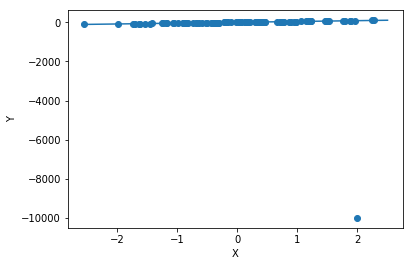

In [8]:
from sklearn.linear_model import HuberRegressor

clf = HuberRegressor() # инициализация регрессора (пока модель глупая и необученная)
clf.fit(X, y) # говорим модели, какие объекты какой ответ имеют. Модель на них обучается. В итоге модель выучит параметры a и b уравнения y = aX + b
a = clf.coef_[0] # коэффициент при первом (а он у нас 1) признаке
b = clf.intercept_
x_line = np.linspace(-2.5, 2.5) # зададим интервал значений для линии по оси X
y_line = a * x_line + b # подставим найденные коэффициенты a и b в уравнение прямой
plt.scatter(X, y) # нарисуем точки из обучающей выборки
plt.ylabel('Y') # подпишем ось Y
plt.xlabel('X') # подпишем ось X
plt.plot(x_line, y_line) # нарисуем прямую

Видим, что HuberRegressor'у пофиг на выброс!

In [9]:
a, b

(42.385500222321916, -0.00013992249663950736)